#  OTT APPLICATION  CHURN PREDICTION

Churn is the rate at which subscribers to a particular OTT service cancel their subscriptions or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\\PROJECT IDEAS\\capstone project\\OTT FINAL dataset.csv")

In [3]:
df.shape

(10000, 16)

In [4]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2020,717810,410-5455,Male,53,99,no,no,300.9,9.4,34.10,118,5,3.0,2.0,0
1,2020,936990,342-3017,Male,41,120,no,no,201.8,9.3,22.80,80,3,3.0,1.0,0
2,2020,683865,345-1220,Male,58,96,no,no,249.7,7.5,28.37,95,5,3.0,0.0,0
3,2020,698399,388-5628,Male,41,22,no,no,293.1,11.0,33.22,73,3,3.0,1.0,0
4,2020,848832,334-4614,Male,45,101,no,no,199.5,4.5,22.61,107,3,2.0,1.0,0


In [5]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,10000.0,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9928.000000,9998.000000,10000.000000
mean,2020.0,554784.337700,38.14110,99.342100,267.891788,10.484240,30.412801,101.304200,4.393100,3.324839,1.573715,0.123900
std,0.0,264255.984922,9.76607,38.273196,73.518346,2.395288,8.215298,18.145633,2.339641,0.705388,1.254906,0.329484
min,2020.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,327810.500000,31.00000,72.750000,222.750000,9.000000,25.250000,89.000000,3.000000,3.000000,1.000000,0.000000
50%,2020.0,568624.000000,37.00000,98.000000,261.700000,10.600000,29.670000,102.000000,4.000000,3.000000,1.000000,0.000000
75%,2020.0,785003.000000,43.00000,125.000000,317.500000,12.000000,35.990000,114.000000,6.000000,4.000000,2.000000,0.000000
max,2020.0,999961.000000,82.00000,241.000000,526.200000,20.000000,59.640000,167.000000,19.000000,6.000000,9.000000,1.000000


In [6]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [7]:
df.nunique()

year                         1
customer_id               7455
phone_no                  9147
gender                       2
age                         64
no_of_days_subscribed      221
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       3483
minimum_daily_mins         154
maximum_daily_mins        2073
weekly_max_night_mins      115
videos_watched              20
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

# REMOVING JUNK FEATURES

In [8]:
data=df.drop(['year','customer_id','phone_no','age'],axis=1)

In [9]:
data

,gender,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Male,99,no,no,300.90,9.4,34.10,118,5,3.0,2.0,0
1,Male,120,no,no,201.80,9.3,22.80,80,3,3.0,1.0,0
2,Male,96,no,no,249.70,7.5,28.37,95,5,3.0,0.0,0
3,Male,22,no,no,293.10,11.0,33.22,73,3,3.0,1.0,0
4,Male,101,no,no,199.50,4.5,22.61,107,3,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,192,no,no,364.55,12.7,41.49,83,2,4.0,1.0,0
9996,Female,110,no,yes,314.80,7.4,35.68,107,1,2.0,2.0,0
9997,Female,150,no,no,264.75,6.6,29.99,113,3,2.0,1.0,0
9998,Female,47,no,no,129.45,12.9,14.75,108,5,4.0,1.0,0


# CHECKING MISSING VALUE

In [10]:
data.isnull().sum()

gender                    56
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     72
customer_support_calls     2
churn                      0
dtype: int64

In [11]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i)

gender
maximum_days_inactive
customer_support_calls


#  REPLACING MISSING VALUES

In [12]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        datype=data[i].dtypes
        if datype==float and int:
            data[i].fillna(data[i].mean(),inplace=True)
        
    

In [13]:
data["gender"].mode()

0    Female
Name: gender, dtype: object

In [14]:
data["gender"].fillna("Female",inplace=True)

In [15]:
data.isnull().sum()

gender                    0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [16]:
data.nunique()

gender                       2
no_of_days_subscribed      221
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       3483
minimum_daily_mins         154
maximum_daily_mins        2073
weekly_max_night_mins      115
videos_watched              20
maximum_days_inactive        8
customer_support_calls      11
churn                        2
dtype: int64

# PLOTS

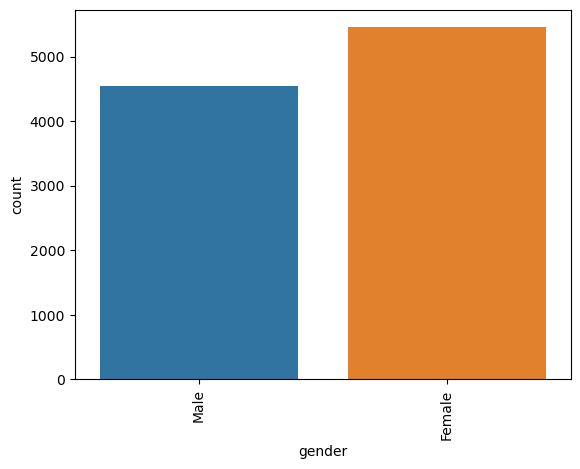

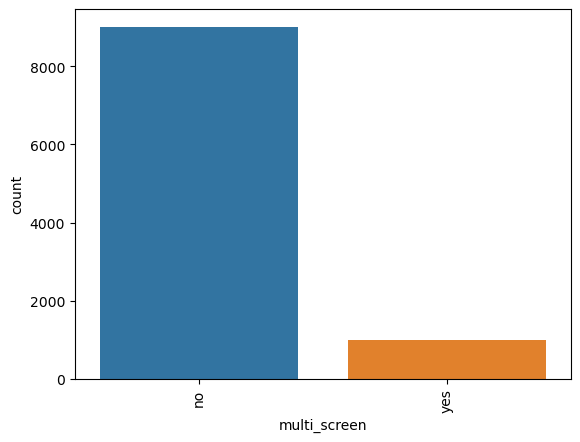

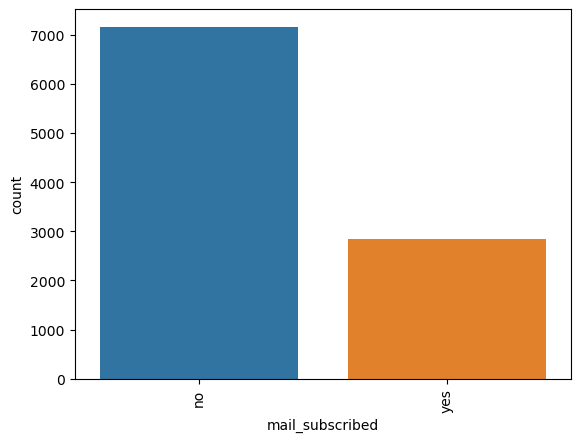

In [17]:
for i in data.columns:
    if data.dtypes[i]== object:
        sns.countplot( x=data[i])
        plt.xticks(rotation=90)
        plt.show()

# LABEL ENCODING

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [19]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=label_encoder.fit_transform(data[i])

In [20]:
data

,gender,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,1,99,0,0,300.90,9.4,34.10,118,5,3.0,2.0,0
1,1,120,0,0,201.80,9.3,22.80,80,3,3.0,1.0,0
2,1,96,0,0,249.70,7.5,28.37,95,5,3.0,0.0,0
3,1,22,0,0,293.10,11.0,33.22,73,3,3.0,1.0,0
4,1,101,0,0,199.50,4.5,22.61,107,3,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,192,0,0,364.55,12.7,41.49,83,2,4.0,1.0,0
9996,0,110,0,1,314.80,7.4,35.68,107,1,2.0,2.0,0
9997,0,150,0,0,264.75,6.6,29.99,113,3,2.0,1.0,0
9998,0,47,0,0,129.45,12.9,14.75,108,5,4.0,1.0,0


# OUTLIER  DETECTING

In [21]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pyod

In [23]:
from pyod.models.cblof import CBLOF
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from warnings import filterwarnings
filterwarnings("ignore")

In [24]:
model_list=[CBLOF(),IForest(),OCSVM(),KNN(),PCA()]
model_name=["cblof","iforest","ocsvm","knn","pca"]

In [25]:
out_model_dfs={}
out_records=np.zeros((data.shape[0],))
for i,j in zip(model_name,model_list):
    out_model_dfs[i]=j.fit(data)
    out_records+=out_model_dfs[i].predict(data)

In [26]:
pos_out=[]
for i,j in enumerate(out_records):
    if j>=3:
        pos_out.append(i)

In [27]:
pos_out

[69,
 92,
 141,
 180,
 195,
 244,
 249,
 259,
 260,
 269,
 357,
 364,
 369,
 379,
 412,
 449,
 453,
 456,
 480,
 520,
 524,
 525,
 544,
 570,
 590,
 719,
 754,
 815,
 846,
 896,
 907,
 908,
 996,
 1022,
 1041,
 1058,
 1062,
 1077,
 1083,
 1123,
 1135,
 1192,
 1229,
 1233,
 1262,
 1282,
 1290,
 1291,
 1337,
 1372,
 1376,
 1388,
 1403,
 1417,
 1426,
 1430,
 1457,
 1464,
 1469,
 1483,
 1493,
 1683,
 1695,
 1739,
 1740,
 1829,
 1847,
 1895,
 1898,
 1907,
 1918,
 1965,
 1969,
 1970,
 2008,
 2039,
 2041,
 2043,
 2060,
 2063,
 2114,
 2143,
 2144,
 2159,
 2181,
 2195,
 2196,
 2265,
 2286,
 2290,
 2326,
 2329,
 2392,
 2428,
 2443,
 2454,
 2512,
 2525,
 2544,
 2551,
 2618,
 2619,
 2628,
 2647,
 2659,
 2663,
 2678,
 2681,
 2686,
 2701,
 2704,
 2729,
 2802,
 2845,
 2882,
 2909,
 2928,
 3036,
 3075,
 3113,
 3123,
 3165,
 3187,
 3273,
 3284,
 3322,
 3330,
 3334,
 3413,
 3450,
 3458,
 3463,
 3473,
 3476,
 3545,
 3548,
 3564,
 3597,
 3599,
 3607,
 3612,
 3615,
 3659,
 3676,
 3704,
 3705,
 3716,
 3717,

# REMOVING OUTLIERS

In [28]:
data.drop(index=pos_out,axis=0,inplace=True)

In [29]:
data.shape

(9551, 12)

# CHECKING  THE DATA WHETHER IT IS BALANCED OR NOT

<Axes: xlabel='churn', ylabel='count'>

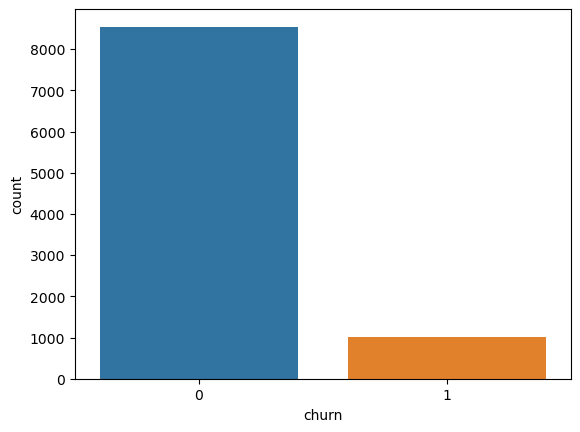

In [30]:
sns.countplot(x=data["churn"])

# DATA SPLIT 

In [31]:
x=data.drop("churn",axis=1)
y=data["churn"]

# HANDLING IMBALANCED DATA

In [32]:
from imblearn.combine import SMOTETomek

In [33]:
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_resample(x,y)

<Axes: xlabel='churn', ylabel='count'>

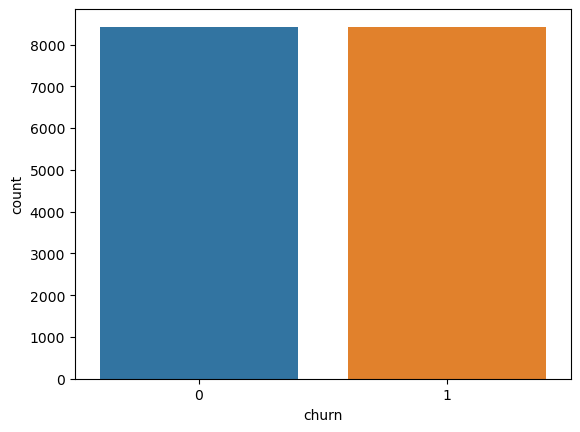

In [34]:
sns.countplot(x=y_res)

# MODEL BUILDING

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [37]:
xtrain.shape,ytrain.shape

((13481, 11), (13481,))

In [38]:
xtest.shape,ytest.shape

((3371, 11), (3371,))

# LOGISTIC REGRESSION

In [39]:
 from sklearn.linear_model import LogisticRegression

In [40]:
model=LogisticRegression()

In [41]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [42]:
predict=model.predict(xtest)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
tn,fp,fn,tp=confusion_matrix(ytest,predict).ravel()

In [45]:
tn,fp,fn,tp

(1267, 437, 375, 1292)

In [46]:
lr_accuracy=(tp+tn)/(tn+fp+fn+tp)

In [47]:
lr_accuracy

0.7591219222782557

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1704
           1       0.75      0.78      0.76      1667

    accuracy                           0.76      3371
   macro avg       0.76      0.76      0.76      3371
weighted avg       0.76      0.76      0.76      3371



# RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [51]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = rf_classifier.predict(xtest)

In [53]:
rf_accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {rf_accuracy}")

Accuracy: 0.9531296351231089


In [54]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1704
           1       0.95      0.95      0.95      1667

    accuracy                           0.95      3371
   macro avg       0.95      0.95      0.95      3371
weighted avg       0.95      0.95      0.95      3371



# GRADIENT BOOSTING

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [57]:
gb_classifier.fit(xtrain, ytrain)


GradientBoostingClassifier(random_state=42)

In [58]:
y_predgb = gb_classifier.predict(xtest)

In [59]:
gb_accuracy = accuracy_score(ytest, y_predgb)
print(f"Accuracy: {gb_accuracy}")

Accuracy: 0.928211213289825


In [60]:
print(classification_report(ytest,y_predgb))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1704
           1       0.95      0.91      0.93      1667

    accuracy                           0.93      3371
   macro avg       0.93      0.93      0.93      3371
weighted avg       0.93      0.93      0.93      3371



# ACCURACY OF THREE MODEL

In [61]:
data = {'Model':['Logistic Regression','RandomForest Classifier', 'GradientBoostingClassifier' ],
        
        'Accuracy Score':[lr_accuracy,rf_accuracy,gb_accuracy]}

comparing_model=pd.DataFrame(data)                               
print(comparing_model)

                        Model  Accuracy Score
0         Logistic Regression        0.759122
1     RandomForest Classifier        0.953130
2  GradientBoostingClassifier        0.928211


# Comparing these models Random Forest has highest Accuracy

#  PREDICTION


In [62]:
import pickle
file_name = 'savemodel.sav'
pickle.dump(rf_classifier,open(file_name,'wb'))

In [63]:
xtest.head()

,gender,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
11507,0,45,0,0,229.131758,10.907504,25.971949,101,3,3.44219,5.115620
7895,0,80,0,0,249.100000,12.100000,28.320000,104,6,4.00000,1.000000
6264,0,120,0,0,413.850000,11.000000,47.180000,109,6,3.00000,1.000000
5456,1,125,0,0,261.000000,12.400000,29.580000,102,3,4.00000,5.000000
9838,1,117,0,0,229.551454,8.582849,26.013831,91,6,3.00000,2.085757


In [64]:
load_model = pickle.load(open(file_name,'rb'))

In [65]:
load_model.predict([[0,178,0,0,372,6.1,42,104,2,2,1]])

array([0], dtype=int64)

# churned=1
   

#  Not churned=0